# MODS205 - Final Project

## Authors:
- **Gabriele LORENZO**
- **Aldo PIETROMATERA**

### Article 1


**CRYPTO’S RICHEST REBEL GOES LEGIT**

Binance has revolutionized the global financial industry and created significant growth in the  digital finance and cryptocurrency sectors.

Founded by Changpeng Zhao in 2017, Binance quickly became the world's largest cryptocurrency exchange by trading volume.
With over a hundred million users, the company consistently records  higher trading volumes than any other platform. However, Binance's breakthrough has raised questions regarding regulation, security, and financial stability.
Fortune's article focuses on the growth of this company and will be linked to  concepts seen during the course.

Above all, Binance's growth has changed market dynamics and  challenged traditional notions of **market efficiency**.
In fact, the platform had to handle an unprecedented  $34.1 trillion in crypto trading volume in 2021.
This evokes discussions about market efficiency, which state the importance of **transparency**, **information dissemination** and **rationality** of market participants.
However, limitations and challenges have emerged in the digital finance space due to the <span style="text-decoration:underline;">volatile nature of cryptocurrency valuations and lack of regulatory clarity</span>.
These challenges highlight  risk management and regulatory compliance issues in digital finance.

The article outlines Binance's operational and regulatory hurdles, illustrating the practical complexities of managing and mitigating risk in an environment that always changes.
As the course highlighted, it is important to develop robust **risk management** frameworks, especially given the rapidly evolving regulatory requirements of the fintech sector.
Furthermore, finance's digital transformation faces obstacles due to the <span style="text-decoration:underline;">rapid pace of innovation and the need to comply with regulatory standards</span>.

Binance's growth over the past few years, along with Changpeng Zhao's vision for the future of cryptocurrency, demonstrates the innovative and disruptive nature of digital finance.
Changpeng Zhao  emphasized the importance of _making trading accessible to a wider audience_, thereby contributing to the democratization of finance.

Binance has had a significant impact on the global economy, reflecting important lessons from economic analysis of blockchain technology.
Its approach, based on **blockchain**, challenges conventional banking and financial services by providing **decentralized**, **transparent** and efficient alternatives.

Binance case studies provide in-depth knowledge of the digital finance principles covered in the course.
It illustrates the real-world implications of cryptocurrencies for market efficiency, the revolutionary potential of blockchain technology, diving deeper into the complexities of risk management and legal challenges in finance.

### Article 2

**Binance CEO Changpeng Zhao charged with money laundering, agrees to step down as part of $4.3 billion DOJ settlement**

The article provides a case study on the intersection of digital finance innovation and regulatory compliance. 

Here are some considerations:

Because of the accusations of cleaning money and breaking sanction rules, CZ's agreement to step down and the substantial $4.3 billion **DOJ settlement highlight the severe consequences of regulatory non-compliance**. This aligns with the course's emphasis on the **importance of regulatory frameworks** in ensuring the _<span style="text-decoration:underline;">integrity</span>_ and _<span style="text-decoration:underline;">stability</span>_ of financial markets.

The article mentions Binance's search of U.S. customers without adhering to anti-money-laundering (AML) and know-your-customer (KYC) laws. This situation directly relates to the course content on the governance of digital finance platforms and the critical role of compliance with **AML** and **KYC** regulations in **promoting _<span style="text-decoration:underline;">trust</span>_** and _<span style="text-decoration:underline;">safety</span>_ in financial transactions.

The federal complaint's focus on sanctions violations shows the legal and economic risks inherent in operating in the global finance ecosystem. It underlines the course discussions on the legal challenges blockchain technologies face and the **importance of aligning the operations made with these technologies with international laws and regulations**.

The Justice Department's assertion that Binance's rise to the largest cryptocurrency exchange was partly due to the crimes committed speaks to the course's themes of market efficiency and the impact of public perception on digital finance platforms. It suggests that <span style="text-decoration:underline;">compliance and ethical operations are not just legal requirements but also critical to maintaining and enhancing market position</span>.

Binance's public push for compliance, including the appointment of a new chief compliance officer, reflects the digital transformation challenges highlighted in the course. It demonstrates the <span style="text-decoration:underline;">struggle that digital finance entities are facing in balancing rapid innovation with the need to adhere to established regulatory frameworks</span>.


## Part 3:

## Setup:

In [421]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew, norm
import seaborn as sns

### Q.3.1: Import data in Excel (2 stocks, CAC40 index, 5-week interest rate from the US Treasury). Sort data by date and make sure that all dates coincides for all columns. Adjust cells if there are missing values.

In [422]:
SAN = pd.read_csv("./data/SAN.PA.csv")
AI = pd.read_csv("./data/AI.PA.csv")
IRX = pd.read_csv("./data/^IRX.csv")
FCHI = pd.read_csv("./data/^FCHI.csv")

# keep only the dates that are in all the dataframes
SAN = SAN[SAN["Date"].isin(IRX["Date"])].reset_index(drop=True)
AI = AI[AI["Date"].isin(IRX["Date"])].reset_index(drop=True)
FCHI = FCHI[FCHI["Date"].isin(IRX["Date"])].reset_index(drop=True)
IRX = IRX[IRX["Date"].isin(SAN["Date"])].reset_index(drop=True)

# transform the dates to datetime
SAN["Date"] = pd.to_datetime(SAN["Date"])
AI["Date"] = pd.to_datetime(AI["Date"])
IRX["Date"] = pd.to_datetime(IRX["Date"])
FCHI["Date"] = pd.to_datetime(FCHI["Date"])

print(len(SAN), len(AI), len(IRX), len(FCHI))

249 249 249 249


### Q.3.2: Give a short financial analysis of the two stocks by using relevant concepts of the course. 

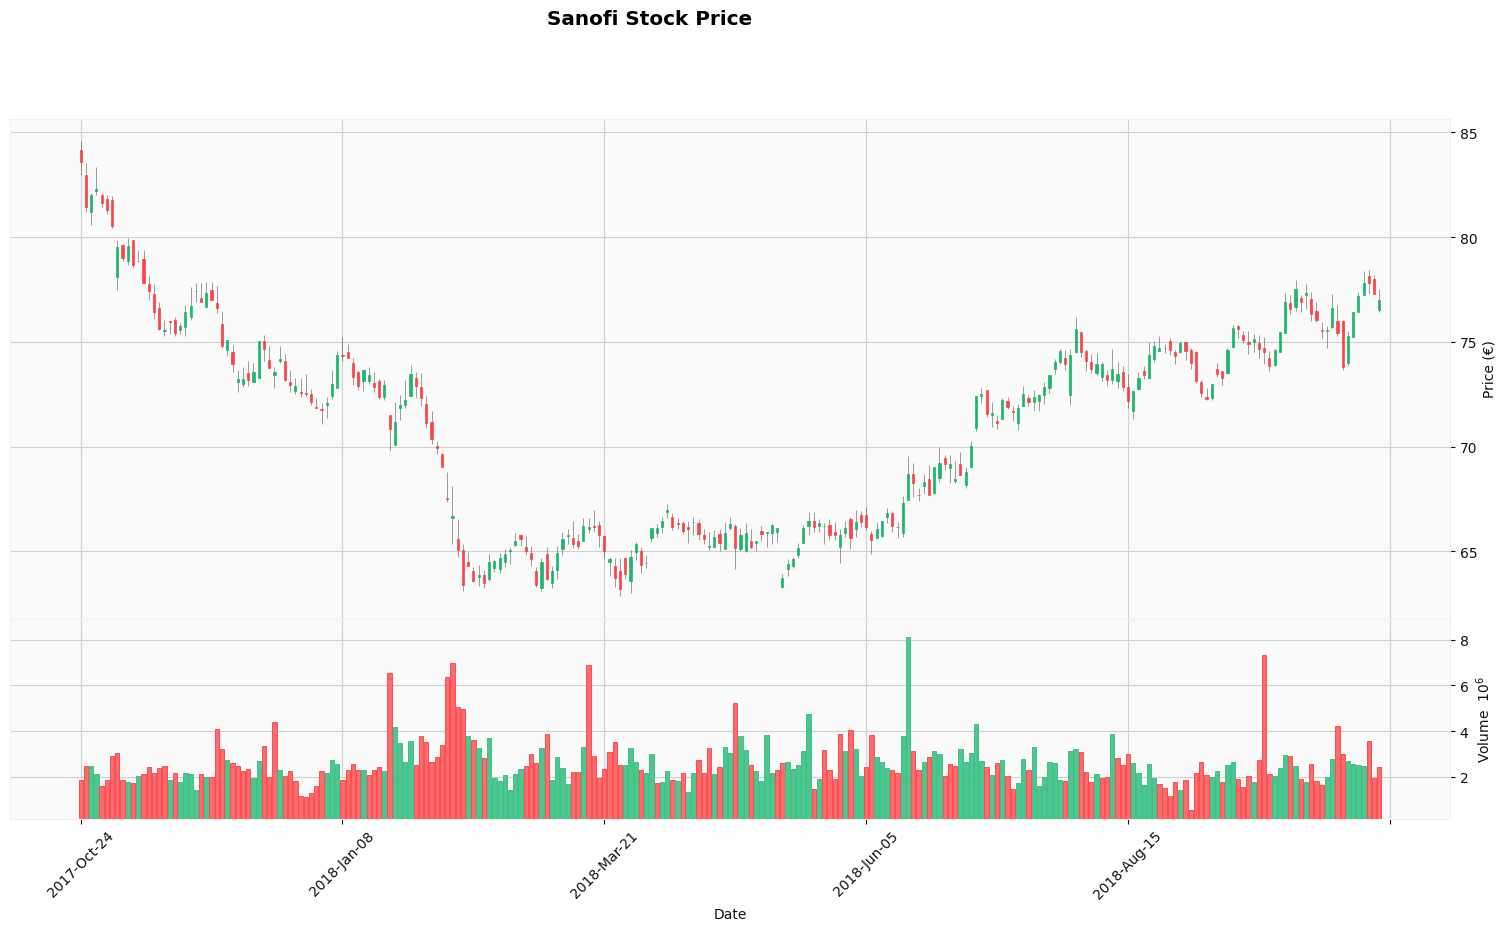

In [423]:
newSAN = SAN.set_index("Date")

mpf.plot(
    newSAN,
    type="candle",
    volume=True,
    title="Sanofi Stock Price",
    style="yahoo",
    xlabel="Date",
    ylabel="Price (€)",
    figsize=(20, 10),
)

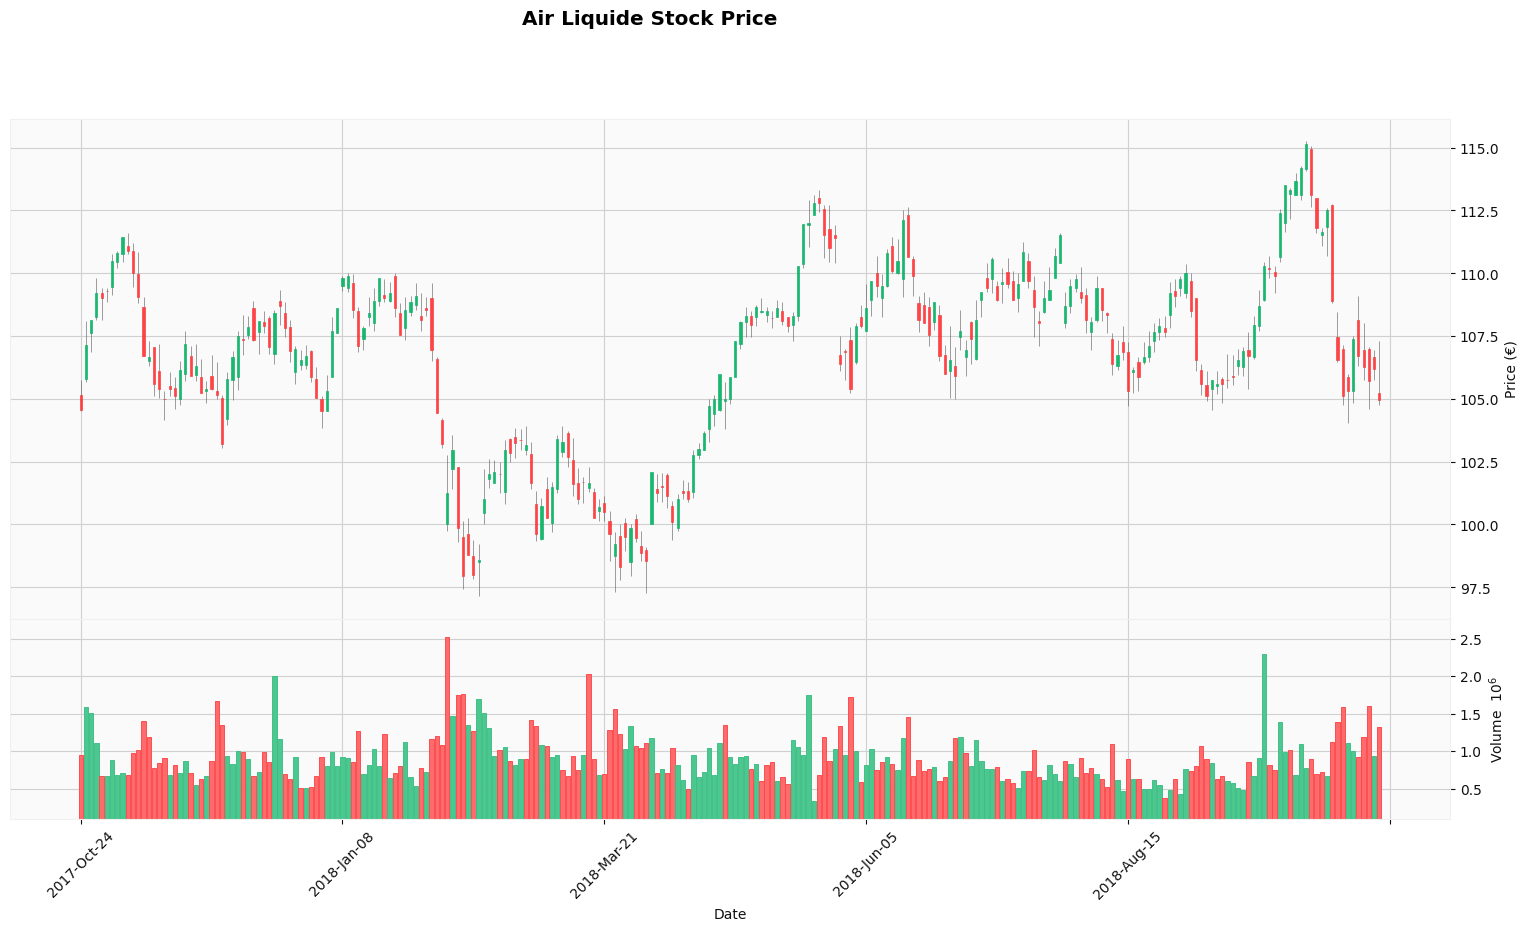

In [424]:
new_AI = AI.set_index("Date")

mpf.plot(
    new_AI,
    type="candle",
    volume=True,
    title="Air Liquide Stock Price",
    style="yahoo",
    xlabel="Date",
    ylabel="Price (€)",
    figsize=(20, 10),
)

### Q.3.3: Compute the return for both stocks and for the CAC40 index. Comment on your results.

In [425]:
SAN["Daily Return"] = SAN["Adj Close"].pct_change()
AI["Daily Return"] = AI["Adj Close"].pct_change()
FCHI["Daily Return"] = FCHI["Adj Close"].pct_change()

SAN["Cumulative Return"] = (1 + SAN["Daily Return"]).cumprod() - 1
AI["Cumulative Return"] = (1 + AI["Daily Return"]).cumprod() - 1
FCHI["Cumulative Return"] = (1 + FCHI["Daily Return"]).cumprod() - 1

#### Sanofi (SAN.PA):

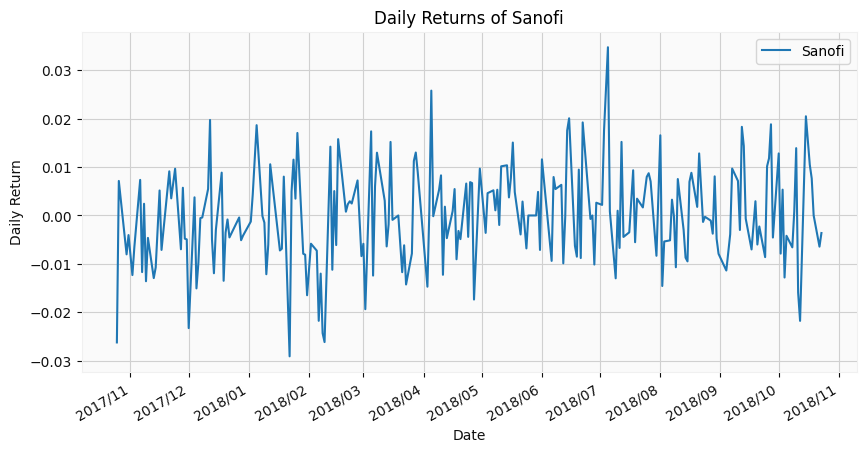

In [426]:
plt.figure(figsize=(10, 5))
plt.plot(SAN["Date"], SAN["Daily Return"], label="Sanofi")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Daily Returns of Sanofi")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()
plt.show()

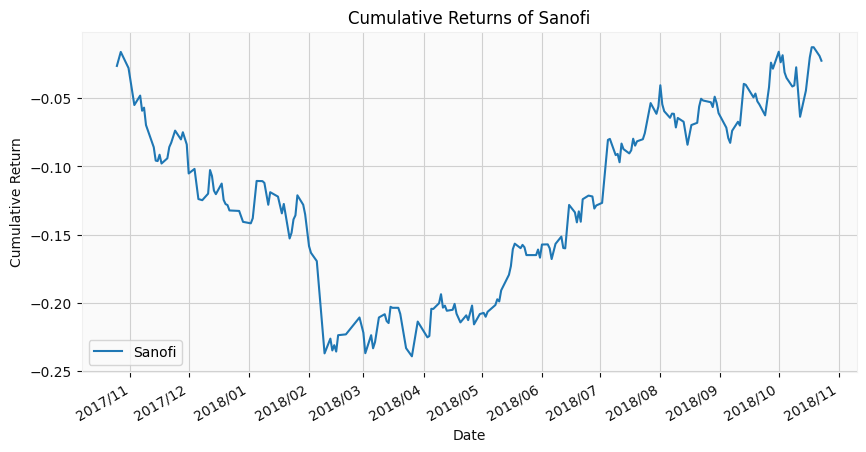

Sanofi price change over the period (1 year): -2.24 %


In [427]:
plt.figure(figsize=(10, 5))
plt.plot(SAN["Date"], SAN["Cumulative Return"], label="Sanofi")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns of Sanofi")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()
plt.show()

print(
    "Sanofi price change over the period (1 year):",
    (SAN["Cumulative Return"].iloc[-1] * 100).round(2),
    "%",
)

#### Air Liquide (AI.PA):

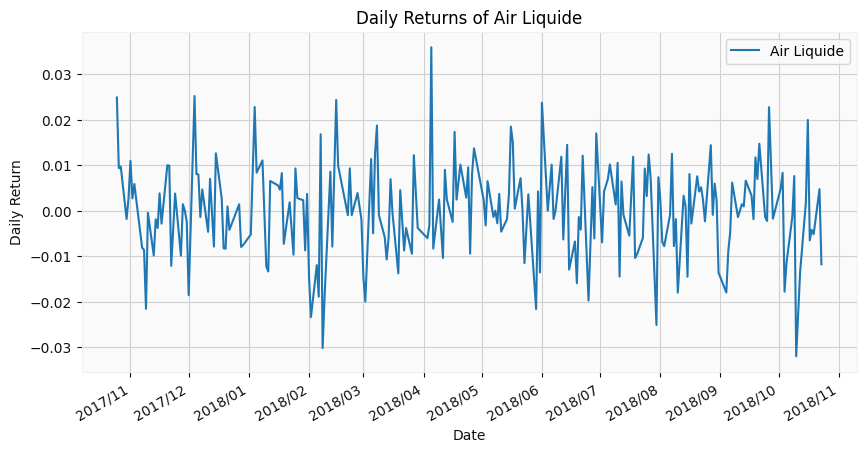

In [428]:
plt.figure(figsize=(10, 5))
plt.plot(AI["Date"], AI["Daily Return"], label="Air Liquide")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Daily Returns of Air Liquide")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()
plt.show()

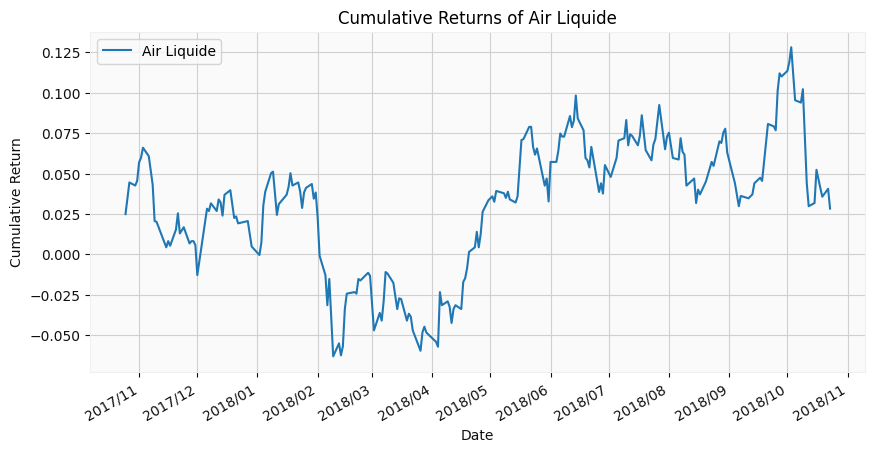

Air Liquide price change over the period (1 year): 2.83 %


In [429]:
plt.figure(figsize=(10, 5))
plt.plot(AI["Date"], AI["Cumulative Return"], label="Air Liquide")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns of Air Liquide")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()
plt.show()

print(
    "Air Liquide price change over the period (1 year):",
    (AI["Cumulative Return"].iloc[-1] * 100).round(2),
    "%",
)

#### CAC40 Index (FCHI):

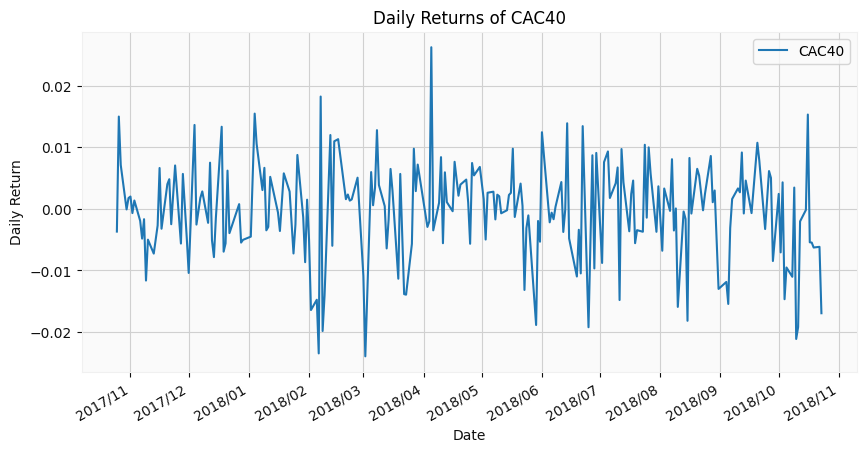

In [430]:
plt.figure(figsize=(10, 5))
plt.plot(FCHI["Date"], FCHI["Daily Return"], label="CAC40")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Daily Returns of CAC40")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()
plt.show()

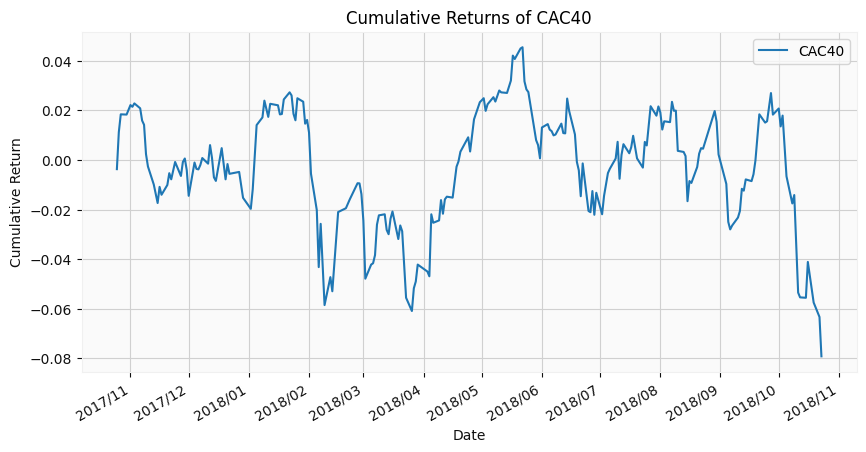

CAC40 price change over the period (1 year): -7.92 %


In [431]:
plt.figure(figsize=(10, 5))
plt.plot(FCHI["Date"], FCHI["Cumulative Return"], label="CAC40")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns of CAC40")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y/%m"))
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.legend()
plt.show()

print(
    "CAC40 price change over the period (1 year):",
    (FCHI["Cumulative Return"].iloc[-1] * 100).round(2),
    "%",
)

We can observe that the daily returns for the two stocks and the CAC40 index are quite similar. This could indicate that there is some sort of correlation between the two stocks and the index.
Moreover we have to add that the daily returns are not really informative, as they seem to be quite volatile.

For what concerns the cumulative returns, we can observe some differences between the two stocks and the index. In particular, we can see that the cumulative return for Sanofi is negative, while the cumulative return for Air Liquide is positive.

### Q.3.4: Compute the coefficients of Kurtosis and of asymmetry of the 3 series of question 3.3. Plot the histograms and comment on your results.

Sanofi kurtosis: 3.3579724759872263
Sanofi excess kurtosis: 0.35797247598722626
Sanofi skewness: 0.046550950065770695


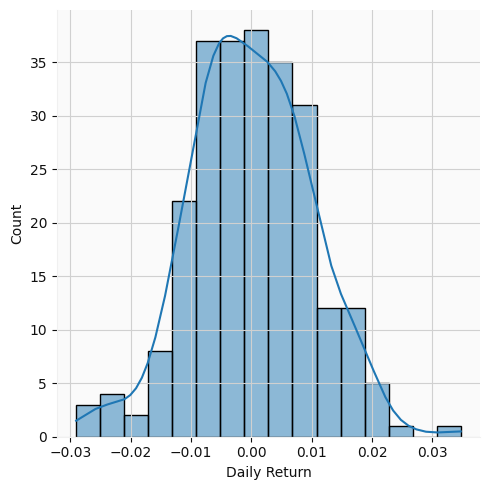

In [432]:
kurtoisis_SAN = kurtosis(SAN["Daily Return"].dropna(), fisher=False)
excess_kurtoisis_SAN = kurtosis(SAN["Daily Return"].dropna(), fisher=True)
skewness_SAN = skew(SAN["Daily Return"].dropna())

print("Sanofi kurtosis:", kurtoisis_SAN)
print("Sanofi excess kurtosis:", excess_kurtoisis_SAN)
print("Sanofi skewness:", skewness_SAN)

sns.displot(SAN["Daily Return"].dropna(), kde=True)

Air Liquide kurtosis: 3.6340596838826427
Air Liquide excess kurtosis: 0.6340596838826427
Air Liquide skewness: -0.07658690054834175


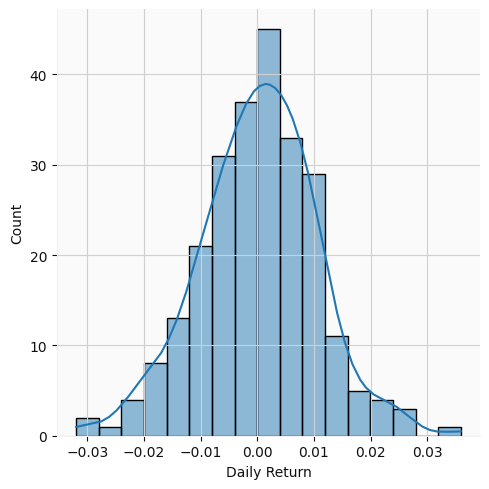

In [433]:
kurtosis_AI = kurtosis(AI["Daily Return"].dropna(), fisher=False)
excess_kurtosis_AI = kurtosis(AI["Daily Return"].dropna(), fisher=True)
skewness_AI = skew(AI["Daily Return"].dropna())

print("Air Liquide kurtosis:", kurtosis_AI)
print("Air Liquide excess kurtosis:", excess_kurtosis_AI)
print("Air Liquide skewness:", skewness_AI)

sns.displot(AI["Daily Return"].dropna(), kde=True)

CAC40 kurtosis: 3.6619326777367056
CAC40 excess kurtosis: 0.6619326777367056
CAC40 skewness: -0.3458724257769478


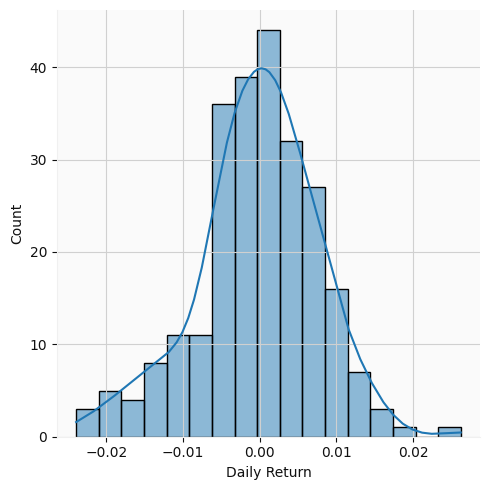

In [434]:
kurtosis_FCHI = kurtosis(FCHI["Daily Return"].dropna(), fisher=False)
excess_kurtosis_FCHI = kurtosis(FCHI["Daily Return"].dropna(), fisher=True)
skewness_FCHI = skew(FCHI["Daily Return"].dropna())

print("CAC40 kurtosis:", kurtosis_FCHI)
print("CAC40 excess kurtosis:", excess_kurtosis_FCHI)
print("CAC40 skewness:", skewness_FCHI)

sns.displot(FCHI["Daily Return"].dropna(), kde=True)

The daily returns distributions of the three stocks can be analyzed based on their kurtosis and skewness values.

**For Sanofi (SAN.PA):**

 - Kurtosis: 3.358 (positive value) indicates that the distribution has heavier tails and a sharper peak compared to a normal distribution.
- Excess Kurtosis: 0.358 (positive value) indicates that the distribution is leptokurtic, meaning it has more extreme values than a normal distribution.
 - Skewness: 0.047 (close to zero) indicates that the distribution is approximately symmetric.

**For Air Liquide (AI.PA):**

- Kurtosis: 3.634 (positive value) indicates that the distribution has heavier tails and a sharper peak compared to a normal distribution.
- Excess Kurtosis: 0.634 (positive value) indicates that the distribution is leptokurtic, meaning it has more extreme values than a normal distribution.
- Skewness: -0.077 (close to zero) indicates that the distribution is approximately symmetric.

**For CAC40 Index (FCHI):**

- Kurtosis: 3.662 (positive value) indicates that the distribution has heavier tails and a sharper peak compared to a normal distribution.
- Excess Kurtosis: 0.662 (positive value) indicates that the distribution is leptokurtic, meaning it has more extreme values than a normal distribution.
- Skewness: -0.346 (negative value) indicates that the distribution is slightly negatively skewed.

These results suggest that the daily returns distributions of all three stocks deviate from a normal distribution. They exhibit heavier tails and a sharper peak, indicating the presence of more extreme values. The skewness values suggest that the distributions are approximately symmetric, except for the CAC40 Index, which has a slight negative skewness.


### Q.3.5: Compute the standard errors of the return for both stocks for the full period and then for 3 sub-periods of equal size. Is volatility constant?

In [435]:
# Compute standard errors for the full period
san_full_std_error = SAN["Daily Return"].std() / np.sqrt(len(SAN))
ai_full_std_error = AI["Daily Return"].std() / np.sqrt(len(AI))

# Compute standard errors for 3 sub-periods
num_sub_periods = 3
sub_period_size = len(SAN) // num_sub_periods

san_sub_std_errors = []
ai_sub_std_errors = []

for i in range(num_sub_periods):
    start_index = i * sub_period_size
    end_index = (i + 1) * sub_period_size

    san_sub_period = SAN["Daily Return"].iloc[start_index:end_index]
    ai_sub_period = AI["Daily Return"].iloc[start_index:end_index]

    san_sub_std_error = san_sub_period.std() / np.sqrt(len(san_sub_period))
    ai_sub_std_error = ai_sub_period.std() / np.sqrt(len(ai_sub_period))

    san_sub_std_errors.append(san_sub_std_error)
    ai_sub_std_errors.append(ai_sub_std_error)

std_errors = pd.DataFrame(
    {
        "Sanofi": [san_full_std_error] + san_sub_std_errors,
        "Air Liquide": [ai_full_std_error] + ai_sub_std_errors,
    },
    index=["Full period", "Sub-period 1", "Sub-period 2", "Sub-period 3"],
)
print(std_errors)

                Sanofi  Air Liquide
Full period   0.000628     0.000651
Sub-period 1  0.001142     0.001179
Sub-period 2  0.000993     0.001109
Sub-period 3  0.001068     0.001107


No, volatility is not constant. The standard errors of the returns for both stocks are not constant over time, they vary across the full period and the three sub-periods. This suggests that the volatility of the stocks is not constant and changes over time.

### Q.3.6. Compute the correlation between each stock and the CAC40. Comment on your results. 

In [436]:
correlation_SAN_adj = SAN["Adj Close"].corr(FCHI["Adj Close"])
correlation_AI_adj = AI["Adj Close"].corr(FCHI["Adj Close"])

correlation_SAN_daily = SAN["Daily Return"].corr(FCHI["Daily Return"])
correlation_AI_daily = AI["Daily Return"].corr(FCHI["Daily Return"])

correlations = pd.DataFrame(
    {
        "Stocks": ["Sanofi", "Air Liquide"],
        "Adj Close": [correlation_SAN_adj, correlation_AI_adj],
        "Daily Return": [correlation_SAN_daily, correlation_AI_daily],
    }
)

print(correlations)

        Stocks  Adj Close  Daily Return
0       Sanofi   0.219912      0.542772
1  Air Liquide   0.647907      0.821386


As we can see from the results in the table, we can conclude that both Sanofi and Air Liquide have a positive correlation with the CAC40 index. However, the correlation is stronger for Air Liquide compared to Sanofi.

### Q.3.7: Compute the returns of a portfolio in which both stocks have an equal weight. Compute the average return and the standard deviation over the whole sample period. Comment on your results.

In [437]:
# we are building a 50/50 portfolio
portfolio = ((SAN["Daily Return"] + AI["Daily Return"]) / 2).dropna()

avg_return = portfolio.mean()
std_return = portfolio.std()

print("Daily Average return of the portfolio:", (avg_return * 100).round(4), "%")
print("Daily Risk of the portfolio:", (std_return * 100).round(2), "%")

print("Sanofi daily risk:", (SAN["Daily Return"].std() * 100).round(2), "%")
print("Air Liquide daily risk:", (AI["Daily Return"].std() * 100).round(2), "%")

# Annualized return and risk
annualized_return = (1 + avg_return) ** 252 - 1
annualized_risk = std_return * np.sqrt(252)

print("\nAnnualized return of the portfolio:", (annualized_return * 100).round(2), "%")
print("Annualized risk of the portfolio:", (annualized_risk * 100).round(2), "%")

# Cumulative return and risk (over the full period 249 days)
cumulative_return = (1 + portfolio).cumprod() - 1
cumulative_risk = std_return * np.sqrt(len(portfolio))

print(
    "\nCumulative return of the portfolio:",
    (cumulative_return.iloc[-1] * 100).round(2),
    "%",
)
print("Cumulative risk of the portfolio:", (cumulative_risk * 100).round(2), "%")

Daily Average return of the portfolio: 0.0061 %
Daily Risk of the portfolio: 0.85 %
Sanofi daily risk: 0.99 %
Air Liquide daily risk: 1.03 %

Annualized return of the portfolio: 1.56 %
Annualized risk of the portfolio: 13.45 %

Cumulative return of the portfolio: 0.64 %
Cumulative risk of the portfolio: 13.34 %


We can observe that the average daily return of the portfolio is positive. This indicates that the portfolio has a positive average return over the whole sample period. The standard deviation of the portfolio is lower than the standard deviation of the individual stocks, indicating that the portfolio has a lower risk compared to the individual stocks.

Moreover, if we look at the annualized and the cumulative returns we can see that they are positive, with a similar volatility.

### Q.3.8: Consider a portfolio with one stock and the risk-free interest rate (you can choose the stock out of the two that are available). What is the optimal portfolio allocation between these two assets for an investor with a utility function presented in the course and A=1.5?

The optimal portfolio allocation between the stock and the risk-free interest rate can be determined using the utility function presented in the course and the given value of A=1.5. The optimal portfolio allocation can be calculated using the following formula:

$$w^* = (E[R] - R_f) / (A * σ^2)$$

Where:
- $E[R]$ = Expected return of the stock
- $R_f$ = Risk-free interest rate
- $A$ = Coefficient of risk aversion
- $σ^2$ = Variance of the stock's return

In [438]:
# risk aversion coefficient
A = 1.5
daily_risk_free_rate = ((1 + IRX["Adj Close"]) ** (1 / 252) - 1) / 100

w_star = (AI["Daily Return"].mean() - daily_risk_free_rate.mean()) / (
    A * AI["Daily Return"].var()
)

print("Daily rebalancing:")
print("Weight of Air Liquide in the portfolio:", (w_star * 100).round(2), "%")
print(
    "Weight of IRX (13 weeks T-bills) in the portfolio:",
    ((1 - w_star) * 100).round(2),
    "%",
)

annualized_risk_free_rate = IRX["Adj Close"].mean() / 100
annualized_return = (1 + AI["Daily Return"].mean()) ** 252 - 1
annualized_risk = AI["Daily Return"].std() * np.sqrt(252)

w_star = (annualized_return - annualized_risk_free_rate) / (A * annualized_risk**2)

print("\nAnnual rebalancing:")
print("Weight of Air Liquide in the portfolio:", (w_star * 100).round(2), "%")
print(
    "Weight of IRX (13 weeks T-bills) in the portfolio:",
    ((1 - w_star) * 100).round(2),
    "%",
)

Daily rebalancing:
Weight of Air Liquide in the portfolio: 79.25 %
Weight of IRX (13 weeks T-bills) in the portfolio: 20.75 %

Annual rebalancing:
Weight of Air Liquide in the portfolio: 63.27 %
Weight of IRX (13 weeks T-bills) in the portfolio: 36.73 %


The difference in weights between daily and annual rebalancing can be attributed to the frequency of rebalancing.

Daily rebalancing allows for more frequent adjustments to account for short-term fluctuations in returns, leading to a higher allocation to the risky asset (Air Liquide).

On the other hand, annual rebalancing smooths out these fluctuations, resulting in a lower allocation to the risky asset and a higher allocation to the risk-free asset over the longer term.

### Q.3.9: Consider the following 3 portfolios:
- ### portfolio 1 has stock 1 as the only component;
- ### portfolio 2 has stock 2 as the only component;
- ### portfolio 3 is the portfolio of question 3.7.

### These are the only portfolio available to investors. Draw the efficient frontier. Which portfolio are inefficient?

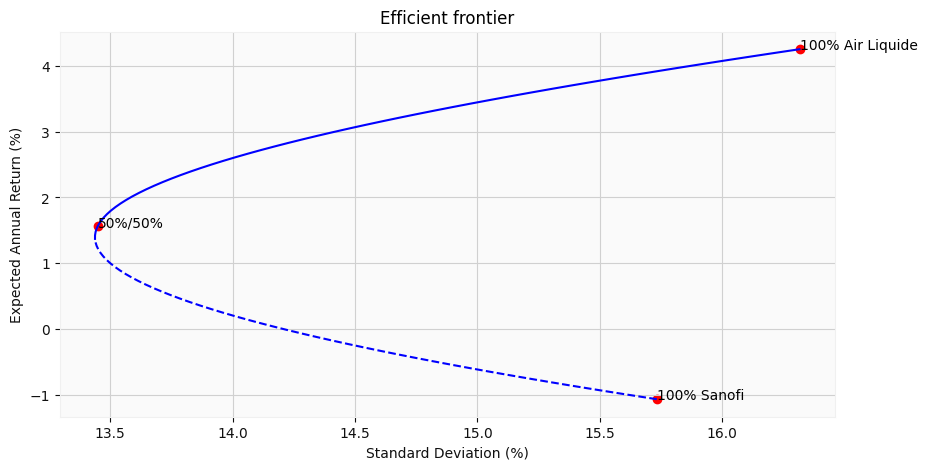

In [439]:
portfolio1 = AI["Daily Return"].dropna()
portfolio2 = SAN["Daily Return"].dropna()
portfolio3 = ((AI["Daily Return"] + SAN["Daily Return"]) / 2).dropna()
portfolios = [portfolio1, portfolio2, portfolio3]

# we annualize the returns and the standard deviation
avg_returns_port = [
    ((1 + portfolio.mean()) ** 252 - 1) * 100 for portfolio in portfolios
]
std_returns_port = [(portfolio.std() * np.sqrt(252)) * 100 for portfolio in portfolios]

plt.figure(figsize=(10, 5))

weights = np.linspace(0, 1, 100)
avg_returns = []
std_returns = []

for w in weights:
    portfolio = (w * AI["Daily Return"] + (1 - w) * SAN["Daily Return"]).dropna()

    # we annualize the returns and the standard deviation
    avg_returns.append(((1 + portfolio.mean()) ** 252 - 1) * 100)
    std_returns.append((portfolio.std() * np.sqrt(252)) * 100)

min_std_index = std_returns.index(min(std_returns))

plt.plot(std_returns[:min_std_index], avg_returns[:min_std_index], "--", c="b")
plt.plot(std_returns[min_std_index:], avg_returns[min_std_index:], c="b")
plt.scatter(std_returns_port, avg_returns_port, c="r")
plt.text(std_returns_port[0], avg_returns_port[0], "100% Air Liquide")
plt.text(std_returns_port[1], avg_returns_port[1], "100% Sanofi")
plt.text(std_returns_port[2], avg_returns_port[2], "50%/50%")
plt.xlabel("Standard Deviation (%)")
plt.ylabel("Expected Annual Return (%)")
plt.title("Efficient frontier")
plt.grid(True)
plt.show()

The portfolios located in the lower half are considered inefficient because they have lower returns for the same level of risk compared to other portfolios on the efficient frontier. Moreover, the portfolios located inside the efficient frontier are also inefficient because they have lower returns and higher risk compared to the portfolios on the efficient frontier.

### Q.3.10: Consider the portfolio of question 3.7. Compute the Sharpe ratio, the Sortino ratio, the Sterling ratio. Why are there differences between these ratios?

In [440]:
def sharpe_ratio(returns, risk_free_rate):
    excess_returns = returns - risk_free_rate

    return excess_returns.mean() / excess_returns.std()


def sortino_ratio(returns, target):
    # we use as downside risk the semi-deviation (we only consider the returns lower than the daily risk-free rate)
    downside_returns = returns[returns < target]
    downside_risk = downside_returns.std()

    return (returns.mean() - target) / downside_risk


def max_drawdown(returns):
    max_dd = 0

    for i in range(len(returns)):
        for j in range(i, len(returns)):
            max_dd = max(max_dd, returns.iloc[i] - returns.iloc[j])

    return max_dd


def sterling_ratio(returns, risk_free_rate):
    max_annual_dd = np.zeros(2)

    split_index = 46
    returns_2017 = returns.iloc[:split_index]
    returns_2018 = returns.iloc[split_index:]

    max_annual_dd[0] = max_drawdown(returns_2017)
    max_annual_dd[1] = max_drawdown(returns_2018)

    return (returns.mean()) / (max_annual_dd.mean() + risk_free_rate.std())

In [441]:
# we use the 13 weeks T-bills as a risk-free rate (we transform it to daily)
daily_risk_free_rate = ((1 + IRX["Adj Close"]) ** (1 / 252) - 1) / 100

portfolio = (AI["Daily Return"] + SAN["Daily Return"] / 2).dropna()

print(
    "Daily Sharpe ratio of the portfolio:",
    sharpe_ratio(portfolio, daily_risk_free_rate),
)
print(
    "Daily Sortino ratio of the portfolio:",
    sortino_ratio(portfolio, target=daily_risk_free_rate.mean()),
)
print(
    "Daily Sterling ratio of the portfolio:",
    sterling_ratio(portfolio, daily_risk_free_rate),
)

Daily Sharpe ratio of the portfolio: 0.007963694147762313
Daily Sortino ratio of the portfolio: 0.012290197342102781
Daily Sterling ratio of the portfolio: 0.00234161627872992


The daily Sharpe ratio of the portfolio is 0.00796, indicating that the portfolio has a positive risk-adjusted return per unit of risk. However, the ratio is relatively low, suggesting that the portfolio's risk-adjusted performance may not be very strong.

The daily Sortino ratio of the portfolio is 0.0122, which is higher than the Sharpe ratio. This indicates that the portfolio's risk-adjusted performance is better when considering only downside risk. The Sortino ratio focuses on the standard deviation of negative returns, providing a more accurate measure of risk-adjusted performance for investors concerned with avoiding losses.

The daily Sterling ratio of the portfolio is 0.0023, which is the lowest among the three ratios. The Sterling ratio takes into account the target return or benchmark, and in this case, the portfolio's performance relative to the target return is relatively weak. This suggests that the portfolio may not be meeting the desired level of risk-adjusted performance compared to the target return.

### Q.3.11: Compute the empirical VAR at 1% for the same portfolio. Compute the 1st percentile of the normal distribution with mean and variance corresponding respectively to the empirical mean and to the empirical variance. Comment on your results. 

Empirical VAR at 1%: -0.02997479917869668
Theoretical VAR at 1%: -0.03034830141976983


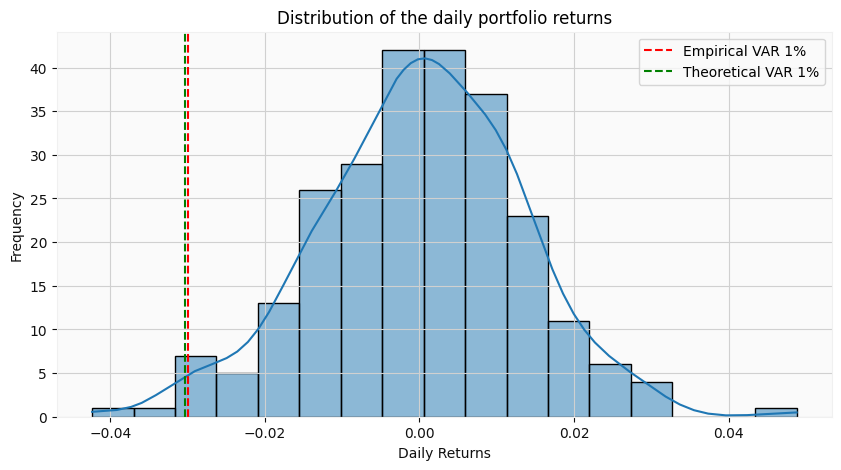

In [442]:
portfolio = (AI["Daily Return"] + SAN["Daily Return"] / 2).dropna()

empirical_var = portfolio.quantile(0.01)
print("Empirical VAR at 1%:", empirical_var)

theoretical_var = norm.ppf(0.01, portfolio.mean(), portfolio.std())
print("Theoretical VAR at 1%:", theoretical_var)

plt.figure(figsize=(10, 5))
sns.histplot(portfolio, kde=True)
plt.axvline(empirical_var, color="r", linestyle="--", label="Empirical VAR 1%")
plt.axvline(theoretical_var, color="g", linestyle="--", label="Theoretical VAR 1%")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Distribution of the daily portfolio returns")
plt.legend()
plt.grid(True)
plt.show()

The empirical VAR at 1% is approximately -0.02997, while the theoretical VAR at 1% is approximately -0.03035.

The VAR (Value at Risk) is a measure of the potential loss that an investment or portfolio may incur over a given time period at a certain confidence level. In this case, the 1% VAR represents the potential loss that the portfolio may experience with a 1% probability.

Comparing the empirical VAR with the theoretical VAR, we can see that they are very close in value. This suggests that the portfolio's returns follow a distribution that is close to a normal distribution, as the theoretical VAR is calculated based on the assumption of a normal distribution.

### Q.3.12: Compute the VAR using resampling with 1000 observations. Compute the 1% VAR on the simulated data set. Comment on your results.

New portfolio shape: (1000, 1)
VAR at 1% (bootstrapping): -0.030163792912040355


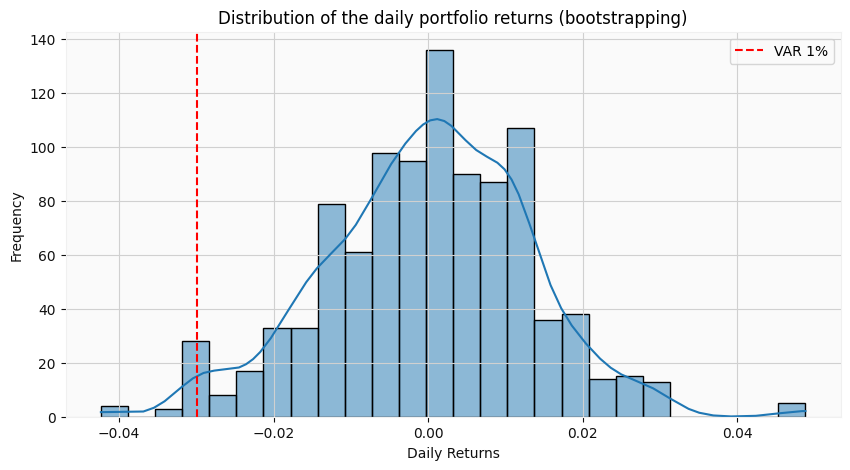

In [443]:
num_samples = 1000

resampled_returns = np.random.choice(portfolio, size=num_samples, replace=True)
resampled_portfolio = pd.DataFrame(resampled_returns)
print("New portfolio shape:", resampled_portfolio.shape)

var = resampled_portfolio.quantile(0.01).values[0]
print("VAR at 1% (bootstrapping):", var)

plt.figure(figsize=(10, 5))
sns.histplot(resampled_portfolio, kde=True)
plt.axvline(empirical_var, color="r", linestyle="--", label="VAR 1%")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Distribution of the daily portfolio returns (bootstrapping)")
plt.legend()
plt.grid(True)
plt.show()

Comparing all the VAR values:

- The VAR obtained through bootstrapping falls between the empirical and theoretical VAR values.
- The empirical VAR is closest to the VAR obtained through bootstrapping, suggesting that the bootstrapping method might be capturing the underlying distribution of the data more accurately than the theoretical model.
- The theoretical VAR tends to be slightly higher than both the bootstrapped and empirical VAR values, which could indicate that the theoretical model might be more conservative in estimating potential losses.

## Part 4:

Initial settings:

In [444]:
assets_names = ["SAN", "AI", "FCHI"]

In [445]:
dates = SAN["Date"]
SAN_prices = np.array(SAN["Adj Close"])
AI_prices = np.array(AI["Adj Close"])
FCHI_prices = np.array(FCHI["Adj Close"])

prices_df = pd.DataFrame(
    {
        "Date": dates,  # 'Date' column is not used in the trading algorithm, it is just for visualization
        "SAN": SAN_prices,
        "AI": AI_prices,
        "FCHI": FCHI_prices,
    }
)

Algorithm:

In [446]:
def algorithm(data, tickers, short_windows, long_windows, cv=False):
    # Calculate moving averages for each stock
    best_short_window = -1
    best_long_window = -1
    best_return = -1000000

    for short_window in short_windows:
        for long_window in long_windows:
            if not cv:
                print(f"\n--- Short window:{short_window}, Long window:{long_window}\n")

            for stock in tickers:
                data[f"{stock}_Short_MA"] = (
                    data[stock].rolling(window=short_window).mean()
                )
                data[f"{stock}_Long_MA"] = (
                    data[stock].rolling(window=long_window).mean()
                )

            # Define trading signals for each stock
            for stock in tickers:
                data[f"{stock}_Signal"] = 0  # 0: do nothing, 1: buy, -1: sell
                data[f"{stock}_Signal"] = np.where(
                    data[f"{stock}_Short_MA"] > data[f"{stock}_Long_MA"], 1, 0
                )
                data[f"{stock}_Signal"] = np.where(
                    data[f"{stock}_Short_MA"] < data[f"{stock}_Long_MA"],
                    -1,
                    data[f"{stock}_Signal"],
                )

            # Calculate positions for each stock
            for stock in tickers:
                data[f"{stock}_Position"] = data[f"{stock}_Signal"].diff()

                data[f"{stock}_Position"] = np.where(
                    data[f"{stock}_Position"] < 0,
                    -1,
                    data[f"{stock}_Position"],
                )
                data[f"{stock}_Position"] = np.where(
                    data[f"{stock}_Position"] > 0,
                    1,
                    data[f"{stock}_Position"],
                )

            # Backtest for each stock
            initial_capital = 10000  # Initial capital in dollars

            selected_col_pos = [f"{stock}_Position" for stock in tickers]
            matrix_position = data[selected_col_pos].to_numpy()

            selected_col_prices = [stock for stock in tickers]
            matrix_prices = data[selected_col_prices].to_numpy()

            capital = initial_capital
            bought = [False for _ in range(len(tickers))]
            portfolio = [0 for _ in range(len(tickers))]

            if not cv:
                store_portfolio_values = []
                store_portfolio_values.append(capital)

            for i in range(len(matrix_prices)):

                if i == len(matrix_prices) - 1 and not cv:
                    print("\n++ Last day... Selling all assets...\n")

                for j in range(len(tickers)):
                    # If it is the last day, sell all the assets
                    if i == len(matrix_prices) - 1:
                        if bought[j] == True:
                            var = portfolio[j] * matrix_prices[i, j]
                            capital += var
                            bought[j] = False
                            portfolio[j] = 0

                            if not cv:
                                print(
                                    f"Capital after selling {tickers[j]} at i={i} and price={matrix_prices[i, j]}:",
                                    capital,
                                )
                    else:
                        if matrix_position[i, j] == 1 and bought[j] == False:  # Buy

                            random_percentage = np.random.uniform(0.15, 0.4)

                            position_size = (
                                capital * random_percentage
                            ) // matrix_prices[i, j]
                            var = position_size * matrix_prices[i, j]

                            capital -= var
                            bought[j] = True
                            portfolio[j] += position_size

                            if not cv:
                                print(
                                    f"Capital after buying {tickers[j]} at i={i} and price={matrix_prices[i, j]}:",
                                    capital,
                                )
                        elif matrix_position[i, j] == -1 and bought[j] == True:
                            var = portfolio[j] * matrix_prices[i, j]
                            capital += var
                            bought[j] = False
                            portfolio[j] = 0

                            if not cv:
                                print(
                                    f"Capital after selling {tickers[j]} at i={i} and price={matrix_prices[i, j]}:",
                                    capital,
                                )

                if not cv:
                    tmp = 0
                    for j in range(len(tickers)):
                        tmp += portfolio[j] * matrix_prices[i, j]
                    store_portfolio_values.append(tmp + capital)

            return_p = (capital - initial_capital) / initial_capital

            daily_risk_free_rate = ((1 + IRX["Adj Close"]) ** (1 / 252) - 1) / 100
            irx = initial_capital * (1 + daily_risk_free_rate).cumprod()
            return_rfr = (irx.iloc[-1] - initial_capital) / initial_capital

            if not cv:
                print("\nInitial capital:", initial_capital)
                print(f"Final capital (Portfolio): {capital:.2f}")
                print(f"Return (Portfolio): {return_p*100:.2f}%")
                print(f"\nFinal capital (Risk-free rate): {irx.iloc[-1]:.2f}")
                print(f"Return (Risk-free rate): {return_rfr*100:.2f}%")

                plt.figure(figsize=(10, 5))
                plt.plot(store_portfolio_values, label="Portfolio value")
                plt.plot(irx, label="Risk-free rate")
                plt.xlabel("Days")
                plt.ylabel("Value")
                plt.title("Networth over time")
                plt.grid(True)
                plt.legend()
                plt.show()

            if return_p > best_return:
                best_return = return_p
                best_short_window = short_window
                best_long_window = long_window

    if cv:
        print()
        print("Best short window:", best_short_window)
        print("Best long window:", best_long_window)
        print(f"Best return: {best_return*100:.2f}%")

    return best_short_window, best_long_window

In [447]:
short_windows = np.arange(5, len(dates) // 8, 1)
long_windows = np.arange(len(dates) // 4, len(dates) // 2, 1)

best_short, best_long = algorithm(
    prices_df, assets_names, short_windows, long_windows, cv=True
)


Best short window: 11
Best long window: 71
Best return: 7.09%


After having choosen the best values for the short and the long windown, we run the algorithm with those values in order to understand if we are able to beat the market or not.


--- Short window:11, Long window:71

Capital after buying FCHI at i=70 and price=5161.810059: 10000.0
Capital after selling FCHI at i=71 and price=5255.899902: 10000.0
Capital after buying FCHI at i=119 and price=5391.640137: 10000.0
Capital after buying AI at i=123 and price=102.502243: 7642.448410999999
Capital after buying SAN at i=133 and price=63.099995: 4676.748646
Capital after selling FCHI at i=166 and price=5327.200195: 4676.748646
Capital after buying FCHI at i=191 and price=5460.97998: 4676.748646
Capital after selling AI at i=199 and price=106.849998: 7134.2986
Capital after selling FCHI at i=201 and price=5349.02002: 7134.2986
Capital after buying FCHI at i=212 and price=5406.850098: 7134.2986
Capital after selling FCHI at i=215 and price=5243.839844: 7134.2986
Capital after buying AI at i=229 and price=112.400002: 5111.098564
Capital after buying FCHI at i=229 and price=5512.72998: 5111.098564
Capital after selling FCHI at i=240 and price=5106.370117: 5111.098564
Capital

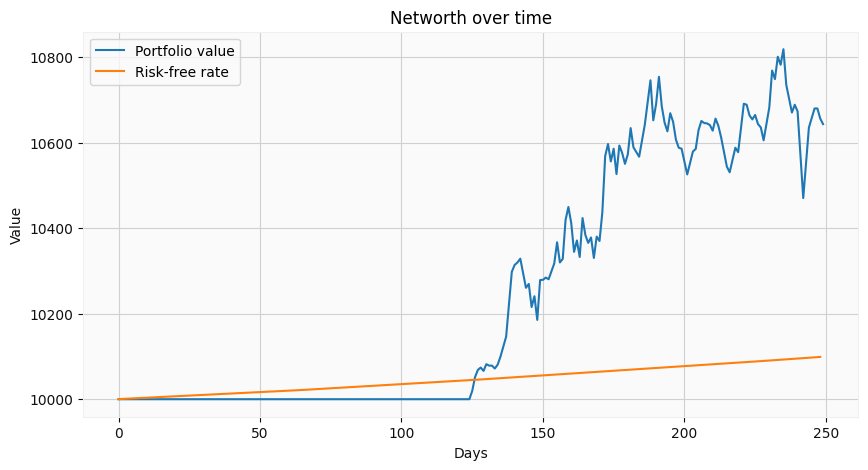

In [448]:
_, _ = algorithm(prices_df, assets_names, [best_short], [best_long], cv=False)

#### Conclusion:

To do our analysis we have taken as market portofolio the IRX index, which is the 13-week Treasury Bill rate. We have chosen this index because it is a risk-free rate.

**Results:**
- Our strategy is able to beat the market, as we can see from the results. On average our portfolio had a positive return of about 5% in the period considered, while the market portfolio had a positive return of about 1%.
- We are aware that we are comparing two different asset classes, but for our simple analysis we thought that it was a good idea to compare our portfolio with this type of market portfolio.

**Future developments:**
- Possible future developments could be to compare our portfolio with a more risky market portfolio, such as the S&P500 index, in order to understand if our strategy is able to beat a more risky market portfolio.
- Moreover, we could also try to optimize the strategy in order to obtain a better performance.